In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
x_train = pd.read_csv('x_train_data.csv')
x_test = pd.read_csv('x_test_data.csv')

In [4]:
y_train = pd.read_csv('y_train_data.csv')
y_test = pd.read_csv('y_test_data.csv')

In [5]:
y_train.value_counts() # balanced data

Loan_Approval_Status
1                       5126
0                       2874
dtype: int64

In [6]:
from sklearn.decomposition import PCA
pc = PCA(n_components=0.95)
x_train=pc.fit_transform(x_train)
x_test = pc.transform(x_test)

In [7]:
pc.explained_variance_ratio_ *100

array([67.99319329, 10.80040851,  3.21988247,  1.62888885,  1.35056976,
        1.32689937,  1.31950644,  1.31273071,  1.27063958,  1.25088137,
        1.17674926,  0.87020472,  0.73264746,  0.60390463,  0.60224785])

In [8]:
#Modeling
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

print("intercept :",log_reg.intercept_)
print('coefficient :',log_reg.coef_)

#prediction
ypred_train = log_reg.predict(x_train)

#train Accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy:", accuracy_score (y_train, ypred_train))

#Cross Validation Score
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(log_reg, x_train,y_train, cv=5, scoring="accuracy").mean())

#prediction
ypred_test = log_reg.predict(x_test)
print("Test accuracy:", accuracy_score (y_test, ypred_test))

intercept : [0.79669961]
coefficient : [[-8.36865739e-04 -1.45195705e-02 -9.53064997e-01  4.09202982e-04
  -3.96202973e-03  4.77504260e-02  2.20554699e-02 -1.91498947e-02
  -3.86492895e-02  6.01243412e-03 -5.53903785e-02 -8.66021887e-02
   1.18968278e-03 -5.70667379e-01  1.32499092e-01]]
Train accuracy: 0.849875
CV Score: 0.8498749999999999
Test accuracy: 0.8385


In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[ 482,  224],
       [  99, 1195]], dtype=int64)

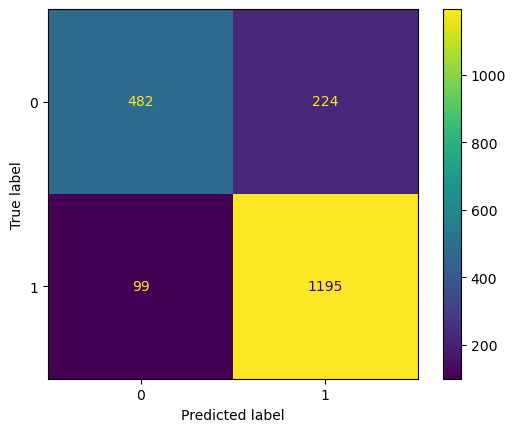

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay 
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()
plt.show()

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       706
           1       0.84      0.92      0.88      1294

    accuracy                           0.84      2000
   macro avg       0.84      0.80      0.81      2000
weighted avg       0.84      0.84      0.83      2000



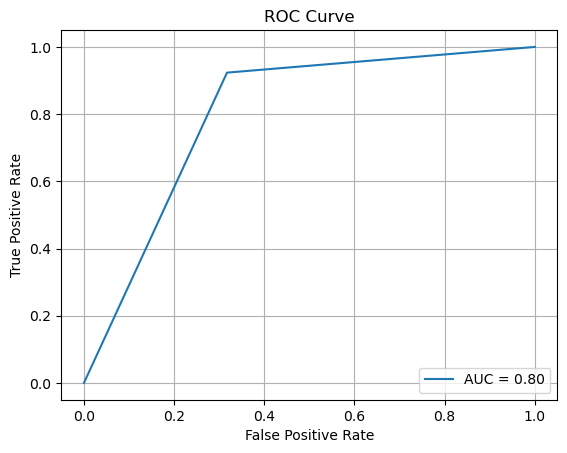

In [12]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve")
plt.grid(True)
plt.show()